### Personal message

Hi Alpamys,

My name is Yonatan.

First of all, I want to thank you for reviewing my project. I realy appreciate your comments and recommendations and learned a lot from them. 

I did some changes and additions in accordance with your review. I hope that my project would be better now :)

# Review

Hi, there!

My name is Alpamys and I am your code reviewer for this project. 

I want to set things up as following:
<div class="alert alert-success">
<b>Reviewer's comment:</b> if everything is done succesfully
</div>

<div class="alert alert-warning">
<b>Reviewer's comment: </b> if I can give some recommendations
</div>

<div class="alert alert-danger">
<b>Reviewer's comment:</b> if the block requires some corrections.
</div>    


<span style="color:orange">

**General feedback**

</span>


First of all, I want to thank you for sending your project. You've done a really good job on it.

I really liked how the code was structured and organized. It was easy to understand.

Moreover, I loved how you were trying to go beyond and demonstrate some overperformance. Keep it up!

Unfortunately, it seems like some questions were misunderstood and there are minor issues with code. Below I have provided some overall recommendations:
* I would recommend providing some introduction and conclusion sections. Try to treat your notebook as an essay which should have the previously mentioned sections. That kind of attitude would guarantee high readability and leave some good impressions about your work
* Visualizations. I highly recommend specifying __title__ and __X-axis & Y-axis labels__. Otherwise, it would be a nameless chart that have no informational value. 
* Try to explain your findings. Otherwise, your points won't have a solid ground
* Restarting and rerunning the code will guarantee that your work is error-free.

While there's room for improvement, on the whole, your project is impressive. Keep it up!


<font color='orange'><b><u>FEEDBACK - Iteration #2</u></b></font>
<div class="alert alert-warning" style="box-shadow: 20px 20px 20px">

Congratulations, your work is accepted🚀
    
I really appreciate the corrections you sent in! Thanks for taking the time to do so.

Loved that every piece of previously provided feedback was taken into account! Thanks!
    
I see that you've visualized more data! Great work, keep it up!
    
Please, note that if everything is fixed then all the orange/red sections will be <s>crossed</s>
    
In case you will want to go deeper into investigation of your central hypothesis about age and responsibility, then try to look at [pivot tables](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) of "Age-group vs Marital status/Income group/etc.". You would find a lot of interesting insights😉. Good luck!
</div>

# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

## Introduction

In this project, I will explore the credit scoring dataset and try to explain the different findings. There are several parameters for credit scoring, I will give my explanation to the probable links between them. 

I will start with filling up the missing values in the dataset and replacing some unreasonable values. After that, I will check for duplicates and drop them. Categorization of several parameters will be the next step to do. 

After preprocessing the dataset, I will try to answer the next questions:
   - Is there a relation between having kids and repaying a loan on time?
   - Is there a relation between marital status and repaying a loan on time?
   - Is there a relation between income level and repaying a loan on time?
   - How do different loan purposes affect on-time repayment of the loan?
    
Finally, I will conclude the whole process in relation to the research question:
   - What borrowers have higher risk of defaulting?

<font color='lime'><b><u>REVIEW - iteration #2 </u></b></font>
<div class="alert alert-success" style="box-shadow: 20px 20px 20px">
Hi! Nice to see you again😊
    
I'm happy to see you've made a few corrections to your work!
    
Great introduction
</div>

## Open the data file and have a look at the general information. 

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from collections import Counter


try:
    df = pd.read_csv('/Users/yonatan/Desktop/Practicum/Projects/Project 1 - Data Preprocessing/credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv') 


df.head()

[nltk_data] Downloading package punkt to /Users/yonatan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yonatan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### Conclusion

* Problems in the dataset: Negative values in 'days_employed', Case sensitivity problem in 'education', unnecesary float type in both 'days_employed' and 'total_income'.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
    
Great points!
    
</div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
It is highly recommended to use one of <b>head(), tail(), sample()</b> methods rather than displaying full dataframe. For instance, if you were about to publish your research on GitHub, then your dataframe won't be truncated to 10 records as it is here, and all the thousands of rows will be displayed.
</div>
</s>

## Data preprocessing

### Processing missing values

#### Checking of missing values

In [70]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

* We have two columns with the same number of missing values. Maybe this is no coincidence and there is a link between them.

#### Checking if the missing values are common in both columns (days_employed, total_income)

In [71]:
len(df[df['days_employed'].isnull() & df['total_income'].isnull()])

2174

* The answer is **yes**. It's possible that the people who never worked are those without total income.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">

👍
    
I really loved the way you have proposed a hypothesis and checked it. Keep it up!
</div>

#### Converting negative values to positive ones in 'days_employed'

In [72]:
df['days_employed'] = df['days_employed'].abs()

* It's plausible that the negative values are there because of human or machine error.

* In order to understand better the days_employed column, let's convert the days to years and add another column - years_employed: 

In [73]:
df['years_employed'] = df['days_employed'] / 365
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.116912
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.026860
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,15.406637
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.300677
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235814


#### Checking mean and median of days_employed

In [74]:
df['days_employed'].mean()

66914.72890682195

In [75]:
median = df['days_employed'].median()
median

2194.220566878695

* There is a significant difference btween the mean to the median. let's check the distribution:

Text(0, 0.5, 'Frequency')

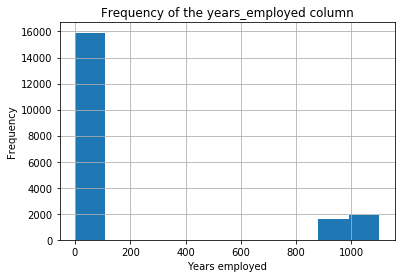

In [76]:
df.hist(column='years_employed')
plt.title('Frequency of the years_employed column')
plt.xlabel('Years employed')
plt.ylabel('Frequency')

<font color='lime'><b><u>REVIEW - iteration #2 </u></b></font>
<div class="alert alert-success" style="box-shadow: 20px 20px 20px">
Loved to see labeled visualizations! Thx :)
</div>

* As we can see, there are unreasonable values in the distribution (ouliers). Maybe the floating point moved two places to the right by human or machine error. let's check what happens if we divide the ouliers by 100 and check the mean:

In [77]:
max_reasonable_year = df[df['years_employed'] < 200]['years_employed'].max() 
normalized_years = df[df['years_employed'] > max_reasonable_year]['years_employed'] / 100
normalized_years.mean()

10.00011807989776

* Ok. This mean is way more reasonable, let's compare this mean with the mean of the other values:

In [78]:
df[df['years_employed'] < 200]['years_employed'].mean()

6.446618991777744

* What can explain this difference between the means? Let's check the income types of the two groups:

In [79]:
df[df['years_employed'] > max_reasonable_year]['income_type'].unique()

array(['retiree', 'unemployed'], dtype=object)

In [80]:
df[df['years_employed'] <= max_reasonable_year]['income_type'].unique()

array(['employee', 'business', 'civil servant', 'student', 'entrepreneur',
       'paternity / maternity leave'], dtype=object)

* It looks like that the outliers values have only two income types: retiree and unemployed. The explanation can be here that these are elderly people, probably they have a higher mean of years employed. Let's check this hypothesis:

In [81]:
df[df['years_employed'] > max_reasonable_year]['dob_years'].mean()

59.12481857764877

In [82]:
df[df['years_employed'] <= max_reasonable_year]['dob_years'].mean()

39.81824468753929

* Yes, indeed! The difference between the dob_years means proves our explanation.

* Let's change the ouliers values according to our findings:

In [83]:
df.loc[df['years_employed'] > max_reasonable_year ,'years_employed'] = df[df['years_employed'] > max_reasonable_year]['years_employed'] / 100

* Let's see how the years_employed column looks like now:

In [84]:
df['years_employed'].max()

50.38068465909146

In [85]:
df['years_employed'].mean()


7.0792376863451345

Text(0, 0.5, 'Frequency')

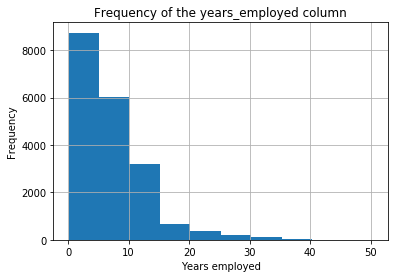

In [86]:
df.hist(column='years_employed')
plt.title('Frequency of the years_employed column')
plt.xlabel('Years employed')
plt.ylabel('Frequency')

* Looks way better!

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Yeap, the column seems to have skewed distribution, thus, imputing missing values with median is preferred.
<div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Earlier, in <b>section 2.1.2</b> you have pointed out that missing values might be caused by some people that have never been employed. In this case, what value is more suitable for imputation?🤔
</div>
</s>

* In accordance with the cause of missing values: the people that have never been employed, let's replace the missing values in days_employed, years_employed and total_income columns with 0:

In [87]:
df['days_employed'].fillna(value=0.0, inplace=True)
df['years_employed'].fillna(value=0.0, inplace=True)
df['total_income'].fillna(value=0.0, inplace=True)

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
👍
</div>

#### Final checking of nulls

In [88]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
dtype: int64

* No nulls anymore!

### Conclusion

* There were only two columns with missing values: days_employed, total_income. After checking the mean and the median in both of them, the missing values in days_employed were replaced by the median and in total_income by the mean.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Really loved your approach! Also, I want to highlight here that you have not forgotten to take absolute values first and only then fill NaNs with median values. Actually, it is one of the tricky moments. Great job!
<div>

### Data type replacement

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
 12  years_employed    21525 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 2.1+ MB


### Replacing with int64, int16

In [90]:
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
dtype: int64

In [91]:
df = df.astype({'children':'int16','days_employed':'int64', 'education_id':'int16', 'family_status_id':'int16', 'debt':'int16', 'total_income':'int64', 'gender':'category'})

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21525 non-null  int16   
 1   days_employed     21525 non-null  int64   
 2   dob_years         21525 non-null  int64   
 3   education         21525 non-null  object  
 4   education_id      21525 non-null  int16   
 5   family_status     21525 non-null  object  
 6   family_status_id  21525 non-null  int16   
 7   gender            21525 non-null  category
 8   income_type       21525 non-null  object  
 9   debt              21525 non-null  int16   
 10  total_income      21525 non-null  int64   
 11  purpose           21525 non-null  object  
 12  years_employed    21525 non-null  float64 
dtypes: category(1), float64(1), int16(4), int64(3), object(4)
memory usage: 1.5+ MB


* Ok, looks Better :)

### Conclusion

* There were several columns with int64 dtype although there was no memory need in this dtype: children, education_id, family_status_id and debt. Their dtype was replaced by int16. In addition, the dtype of total_income and days_employed was replaced by int64 from float64, because there is no need in float and as a matter of readability. Moreover, I changed the type of gender to category.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Awesome! It's really good that you know difference between <b>int16</b>/<b>int64</b>
    
</div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Also, note that some of the columns that contain <b>object</b> could have been converted into more suitable data types. For instance, we see that <b>education</b> and <b>family_status</b> columns have their numerical representations - <b>education_id</b> and <b>family_status_id</b>, respectively. Thus, we could have converted <b>gender</b> into <b>int/boolean/categorical</b> data type
</div>
</s>

### Processing duplicates

* Lowering the the text columns to avoid case sensitivity problems:

In [93]:
df['education'] = df['education'].str.lower()
df['family_status'] = df['family_status'].str.lower()
df['gender'] = df['gender'].str.lower()
df['income_type'] = df['income_type'].str.lower()
df['purpose'] = df['purpose'].str.lower()

####  Checking of duplicates:

In [94]:
df.duplicated().sum()

71

<s>
<font color='red'><b><u>NEEDS FIXING</u></b></font>
<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
Tricky alert! Here, columns with text should have been lowered in order to see real number of duplicates. 
</div>
</s>

#### General checking of values

In [99]:
np.sort(df['dob_years'].unique())

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

* One of the values in our array is 0. Maybe there are people in our datset that we don't know their age. Let's chech how many of them there are:

In [100]:
len(df[df['dob_years'] == 0])

101

* Let's check the mean and the median of dob_years:

In [101]:
df['dob_years'].median()

42.0

In [102]:
dob_years_mean = int(df['dob_years'].mean())
dob_years_mean

43

* We can replace the missing values in dob_years with the mean:

In [103]:
df.loc[df['dob_years'] == 0, 'dob_years'] = dob_years_mean

* Another checking:

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Not sure if those values should have been dropped. Maybe initially there were some missing values, and they were filled with 0. I would suggest treating those values as missing values and try to impute them with mean/median. Dropping those values might be too radical
</div>
</s>

In [104]:
len(df[df['dob_years'] == 0])

0

* Looks better :)

In [105]:
np.sort(df['children'].unique())

array([-1,  0,  1,  2,  3,  4,  5, 20], dtype=int16)

* There are two strange values in the children column: -1 and 20.

* Let's check how many of them we have:

In [106]:
len(df[df['children'] == -1])

47

In [107]:
len(df[df['children'] == 20])

76

* Let's change their values.

* Probably, 20 children is a result of a typo. So, I'll change it to 2:

In [108]:
df.loc[df['children'] == 20, 'children'] = 2

* The value of -1 children is probably a result of a lack of information. So, let's check the mean and the median and choose one of them:

In [109]:
children_mean = df['children'].mean()
children_mean

0.4753542392566783

In [110]:
df['children'].median()

0.0

* Let's take the mean as a replacement for missing values in children column:

In [111]:
df.loc[df['children'] == -1, 'children'] = children_mean

* Last check:

In [149]:
df[(df['children'] == -1) | (df['children'] == 20)].count().sum()

0

* Ok. we are done with it.

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
-1 might indicate the lack of information about children. Also, it is possible that it is not a <b>minus sign</b>, but a <b>hyphen</b>. Latter is less possible, since in that case we should have some other "negative values".

Here, I would again suggest to treat -1 as missing values.
    
20 might be due to a typo and it is actually 2.
    
It would've been great if those kind hypotheses were proposed by you, since it will demonstrate your expertise
</div>
</s>

* Let's check the education values:

In [113]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

* Ok. Checked!

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Great!
</div>

* Let's check the education id values:

In [114]:
df['education_id'].unique()

array([0, 1, 2, 3, 4], dtype=int16)

* Looks good here :)

* Checking gender unique values:

In [43]:
df['gender'].unique()

array(['f', 'm', 'xna'], dtype=object)

* There is strange value here: xna. Maybe there are people that we don't know their gender in the datset. Let's check how many of them we have:

In [44]:
len(df[df['gender'] == 'xna'])

1

* Because it is a categorical data type, we will check the mode:

In [115]:
df['gender'].mode()

0    f
dtype: object

* Let's replace the missing value with the mode:

In [116]:
df.loc[df['gender'] == 'xna', 'gender'] = 'f'

* Checking the other unique values:

In [118]:
df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [119]:
df['family_status_id'].unique()

array([0, 1, 2, 3, 4], dtype=int16)

In [120]:
df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'entrepreneur', 'student', 'paternity / maternity leave'],
      dtype=object)

In [121]:
df['debt'].unique()

array([0, 1], dtype=int16)

In [123]:
df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

* Looks good so far :)

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Good! Seems like you already have some experience in dealing with text features? :)
</div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Have you noticed that <b>gender</b> has some XNA values? It seems like those XNA used instead of missing values. How we can fill those XNA with M/F?
</div>
</s>

* Let's see how the duplicates look like:

In [125]:
df[df.duplicated()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
2849,0.0,0,41,secondary education,1,married,0,f,employee,0,0,purchase of the house for my family,0.0
3290,0.0,0,58,secondary education,1,civil partnership,1,f,retiree,0,0,to have a wedding,0.0
4182,1.0,0,34,bachelor's degree,0,civil partnership,1,f,employee,0,0,wedding ceremony,0.0
4851,0.0,0,60,secondary education,1,civil partnership,1,f,retiree,0,0,wedding ceremony,0.0
5557,0.0,0,58,secondary education,1,civil partnership,1,f,retiree,0,0,to have a wedding,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0.0,0,64,secondary education,1,married,0,f,retiree,0,0,supplementary education,0.0
21032,0.0,0,60,secondary education,1,married,0,f,retiree,0,0,to become educated,0.0
21132,0.0,0,47,secondary education,1,married,0,f,employee,0,0,housing renovation,0.0
21281,1.0,0,30,bachelor's degree,0,married,0,f,employee,0,0,buy commercial real estate,0.0


* Let's drop them:

In [128]:
df = df.drop_duplicates().reset_index()

In [129]:
df.shape[0]

21454

* So we have less rows, but not too less!

### Conclusion

* After checking and fixing some strange values, I dropped the duplicates.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Overall, your approach is outstandingly good. You've gone beyond and dropped duplicates only after removing strange values from each column. The only thing that I would recommend is to try to hypothesize why "strange" values appear and propose some plausible solutions
</div>

### Categorizing Data

#### Categorizing by income level

* First I want to know the range of the total income:

In [130]:
df['total_income'].min()

0

In [131]:
max = df['total_income'].max()
max

362496

* Let's check the total income distribution:

Text(0, 0.5, 'Frequency')

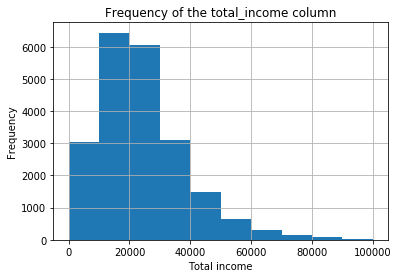

In [132]:
df[df['total_income'] < 100000].hist(column='total_income')
plt.title('Frequency of the total_income column')
plt.xlabel('Total income')
plt.ylabel('Frequency')

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Awesome! Really liked that you have a visualization here!
</div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
It is highly recommended to provide axis labels and title. In real world, some non-tech guys might have a look into your work. Those guys won't understand your visualization, since they are not familiar with coding.
</div>
</s>

* In order to find how to divide the total income correctly to groups, let's get the quartiles:

In [59]:
pd.qcut(df['total_income'], 4)

0        (31330.0, 362496.0]
1         (14254.0, 21724.5]
2         (21724.5, 31330.0]
3        (31330.0, 362496.0]
4         (21724.5, 31330.0]
                ...         
21449    (31330.0, 362496.0]
21450     (21724.5, 31330.0]
21451     (14254.0, 21724.5]
21452    (31330.0, 362496.0]
21453      (-0.001, 14254.0]
Name: total_income, Length: 21454, dtype: category
Categories (4, interval[float64]): [(-0.001, 14254.0] < (14254.0, 21724.5] < (21724.5, 31330.0] < (31330.0, 362496.0]]

* Now that we know the quartiles, we can write the function for this category:

In [133]:
def total_income_category(total_income):
    if total_income < 17208.5:
        return 'low'
    elif 17208.5 <= total_income < 24971:
        return 'medium'
    elif 24971 <= total_income < 31329:
        return 'high'
    else:
        return 'very high'

* Applying the function to the category:

<font color='orange'><b><u>REMARK - iteration #2 </u></b></font>
<div class="alert alert-warning" style="box-shadow: 20px 20px 20px">
    You could've achieved the same result by just passing category names to <b>labels=</b> argument in <b>pd.qcut</b>. For instance, <b>pd.qcut(data['column'], q = 3, labels = ['low', 'medium', 'high'])</b>
</div>

In [134]:
df['total_income_category'] = df['total_income'].apply(total_income_category)
df.head()

,level_0,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category
0,0,0,1.0,8437,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,23.116912,very high
1,1,1,1.0,4024,36,secondary education,1,married,0,f,employee,0,17932,car purchase,11.026860,medium
2,2,2,0.0,5623,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,15.406637,medium
3,3,3,3.0,4124,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,11.300677,very high
4,4,4,0.0,340266,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,9.322358,high


* Done.

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
    
Here, I would prefer categorizing with the help of quantiles. For example, [pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) function might be a good choice
</div>
</s>

#### Categorizing by purpose 

#### Option 1: Stemming 

* Before the stemming let's join all the text in the purpose column:

In [135]:
text = ' '.join(row for row in df['purpose'])

* Stemming and counting the words in purpose:

In [136]:
english_stemmer = SnowballStemmer('english')

words = text.split(' ')
stemmed_list = []

for word in words:
    stemmed_word = english_stemmer.stem(word)
    stemmed_list.append(stemmed_word)    

words_counter = pd.DataFrame.from_dict(Counter(stemmed_list), orient = 'index')
words_counter.sort_values(by=0, ascending=False)

,0
a,5104
real,4464
estat,4464
car,4306
buy,3993
hous,3809
educ,3517
purchas,3306
to,3064
of,2994


<s>
<font color='red'><b><u>NEEDS FIXING</u></b></font>
<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
The cell above cannot be executed due to <b>NameError</b>. It seems like <b>text</b> variable was renamed to <b>word</b>. 
    
I belive that it will be an easy fix for you!
</div>
</s>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
    
The question here is asking for categorization of numerical columns.
    
However, I really appreciate that you have decided to go beyond and tried to categorize <b>purpose</b> column. Keep this kind of attitude and you will become a high-skilled professional. I believe in you 😊
    
Here some suggestions that might help you:
* I would recommend using lemmatization rather than stemming. You can find some examples by the following [link](https://www.kaggle.com/getting-started/186152)
* Try not to print out huge text variables. Otherwise, the notebook will look messy
* If you have some brilliant idea, please, share it! Try to always assume that some non-tech guy will look into your notebook, thus everything should be clear. That way anyone will be able to understand your thoughts and won't bother you😉
    
</div>
</s>

* Now I can identify the important words and divide them into categories:

In [137]:
education = ['univers' , 'educ', ]
housing = ['hous', 'properti', 'estat']

* Let's write the function and apply it: 

In [138]:
def purpose_category(text):
    words = text.split(' ')
    for word in words:
        stemmed_word = english_stemmer.stem(word)
        if stemmed_word in education:
            return 'education'
        elif stemmed_word in housing:
            return 'housing'
        elif stemmed_word == 'car':
            return 'car'
        elif stemmed_word == 'wed':
            return 'wedding'

df['purpose_category'] = df['purpose'].apply(purpose_category)
df.head()

,level_0,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category
0,0,0,1.0,8437,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,23.116912,very high,housing
1,1,1,1.0,4024,36,secondary education,1,married,0,f,employee,0,17932,car purchase,11.026860,medium,car
2,2,2,0.0,5623,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,15.406637,medium,housing
3,3,3,3.0,4124,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,11.300677,very high,education
4,4,4,0.0,340266,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,9.322358,high,wedding


In [139]:
df['purpose_category'].isnull().sum()

0

* So far so good!

#### Option 2: Lemmatization 

In [140]:
wordnet_lemma = WordNetLemmatizer() 
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in words]

In [141]:
lemmas_counter = pd.DataFrame.from_dict(Counter(lemmas), orient = 'index')
lemmas_counter.sort_values(by=0, ascending=False)

,0
a,5104
estate,4464
real,4464
car,4306
purchase,3306
education,3109
to,3064
of,2994
transaction,2604
property,2538


In [142]:
education = ['education', 'educated', 'university']
housing = ['estate', 'property', 'housing', 'house']
wedding = ['wedding']
car = ['car']

In [143]:
def purpose_category(text_row):
    words = text_row.split(' ')
    for word in words:
        lemmatized_word = wordnet_lemma.lemmatize(word, pos = 'n')
        if lemmatized_word in education:
            return 'education'
        elif lemmatized_word in housing:
            return 'housing'
        elif lemmatized_word == 'car':
            return 'car'
        elif lemmatized_word == 'wedding':
            return 'wedding'

df['purpose_category'] = df['purpose'].apply(purpose_category)

In [150]:
df['purpose_category'].isnull().sum()

0

#### Categorization by age (dob_years)

In [151]:
def dob_years_category(dob_years):
    if dob_years <= 29:
        return 'early adulthood'
    elif 30 <= dob_years <= 39: 
        return 'adulthood'
    elif 40 <= dob_years <= 59:
        return 'middle age'
    else:
        return 'early elder'

In [152]:
df['dob_years_category'] = df['dob_years'].apply(dob_years_category)
df.head()

,level_0,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category,dob_years_category
0,0,0,1.0,8437,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,23.116912,very high,housing,middle age
1,1,1,1.0,4024,36,secondary education,1,married,0,f,employee,0,17932,car purchase,11.026860,medium,car,adulthood
2,2,2,0.0,5623,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,15.406637,medium,housing,adulthood
3,3,3,3.0,4124,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,11.300677,very high,education,adulthood
4,4,4,0.0,340266,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,9.322358,high,wedding,middle age


<font color='orange'><b><u>REMARK - iteration #2 </u></b></font>
<div class="alert alert-warning" style="box-shadow: 20px 20px 20px">
We could categorize with quantiles as well.
</div>

#### Categorization by seniority (years_employed)

In [153]:
def seniority (years_employed):
    if years_employed < 10:
        return 1
    elif 10 <= years_employed < 20:
        return 2
    elif 20 <= years_employed < 30:
        return 3
    elif 30 <= years_employed < 40:
        return 4
    else:
        return 5

df['seniority'] = df['years_employed'].apply(seniority)
df.head()

,level_0,index,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category,dob_years_category,seniority
0,0,0,1.0,8437,42,bachelor's degree,0,married,0,f,employee,0,40620,purchase of the house,23.116912,very high,housing,middle age,3
1,1,1,1.0,4024,36,secondary education,1,married,0,f,employee,0,17932,car purchase,11.026860,medium,car,adulthood,2
2,2,2,0.0,5623,33,secondary education,1,married,0,m,employee,0,23341,purchase of the house,15.406637,medium,housing,adulthood,2
3,3,3,3.0,4124,32,secondary education,1,married,0,m,employee,0,42820,supplementary education,11.300677,very high,education,adulthood,2
4,4,4,0.0,340266,53,secondary education,1,civil partnership,1,f,retiree,0,25378,to have a wedding,9.322358,high,wedding,middle age,1


### Conclusion

* I added 4 categories to the dataset: purpose_category (car, wedding, education, housing), total_income_category (low, medium, high, very high), dob_years_category (early adulthood, adulthood, middle age, early elder) and seniority level (1-5).

<s>
<font color='red'><b><u>NEEDS FIXING</u></b></font>
<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
What other numerical columns can be categorized?🤔
</div>
</s>

## Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [154]:
df_pivot = df.pivot_table(
    index=['children'],
    columns='debt',
    values='family_status_id',
    aggfunc='count',
    margins=True
)
df_pivot['dafault_rate'] = (df_pivot[1] / df_pivot['All']) * 100
df_pivot.sort_values('dafault_rate', ascending=False)

debt,0,1,All,dafault_rate
children,,,,
4.0,37.0,4.0,41,9.756098
2.0,1926.0,202.0,2128,9.492481
1.0,4364.0,444.0,4808,9.234609
3.0,303.0,27.0,330,8.181818
All,19713.0,1741.0,21454,8.115037
0.0,13028.0,1063.0,14091,7.543822
0.4753542392566783,46.0,1.0,47,2.127660
5.0,9.0,NaN,9,NaN


### Conclusion

* It looks like people with no kids have the lowest default rate. The more kids - the higher default rate. The hypothesis can be about expenses: people with kids have more expenses than people who don't have kids, thus it's more probable to people without kids to repay their loan.

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
Absolutely correct!
</div>

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
I really wanted to see some hypotheses here. Why child free people tend to have lower default rates?🤔
</div>
</s>

- Is there a relation between marital status and repaying a loan on time?

In [155]:
df_pivot = df.pivot_table(
    index=['family_status'],
    columns='debt',
    values='family_status_id',
    aggfunc='count',
    margins=True
)
df_pivot['dafault_rate'] = (df_pivot[1] / df_pivot['All']) * 100
df_pivot.sort_values('dafault_rate', ascending=False)

debt,0,1,All,dafault_rate
family_status,,,,
unmarried,2536,274,2810,9.750890
civil partnership,3763,388,4151,9.347145
All,19713,1741,21454,8.115037
married,11408,931,12339,7.545182
divorced,1110,85,1195,7.112971
widow / widower,896,63,959,6.569343


### Conclusion

* There is a relation between the family status to repaying a loan. Unmarried  people have the hieghst default rate and widows/widowers have the lowest default rate. Here, my hypothsis is about age and responsibility: unmarried people are usually young while widowers/widows are elder. Probably that young people have less responsibility than elders. We can see here the stages of relationships and the correlation with age: unmarried -> civil partnership/married -> divorced -> widow / widower.

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
What might be the reason?🤔
</div>
</s>

- Is there a relation between income level and repaying a loan on time?

In [156]:
df_pivot = df.pivot_table(
    index=['total_income_category'],
    columns='debt',
    values='family_status_id',
    aggfunc='count',
    margins=True
)
df_pivot['dafault_rate'] = (df_pivot[1] / df_pivot['All']) * 100
df_pivot.sort_values('dafault_rate', ascending=False)

debt,0,1,All,dafault_rate
total_income_category,,,,
high,2965,293,3258,8.993247
medium,4900,468,5368,8.718331
All,19713,1741,21454,8.115037
low,6867,597,7464,7.998392
very high,4981,383,5364,7.140194


### Conclusion

* There is a relation between income level to repaying a loan. The people with higher incomes are below the average in the default rate and the people with the low incomes have more chances to default. 

<font color='green'><b><u>REVIEW</u></b></font>
<div class="alert alert-success" style="box-shadow: 4px 4px 4px">
👍
</div>

- How do different loan purposes affect on-time repayment of the loan?

In [157]:
df_pivot = df.pivot_table(
    index=['purpose_category'],
    columns='debt',
    values='family_status_id',
    aggfunc='count',
    margins=True
)

df_pivot['dafault_rate'] = (df_pivot[1] / df_pivot['All']) * 100
df_pivot.sort_values('dafault_rate', ascending=False)

debt,0,1,All,dafault_rate
purpose_category,,,,
car,3903,403,4306,9.359034
education,3643,370,4013,9.220035
All,19713,1741,21454,8.115037
wedding,2138,186,2324,8.003442
housing,10029,782,10811,7.233373


### Conclusion

* Taking a loan for a purpose of buying a car or financing higher education is more risky than taking it for a wedding or housing purposes. Again, we see the link between age and responsibility: young people, who in need for car and education, are more probable for not repaying their loan, while the olders, who in need for wedding and housing, are less probable for doing so. 

<s>
<font color='orange'><b><u>REMARK</u></b></font>
<div class="alert alert-warning" style="box-shadow: 4px 4px 4px">
Is it coherent with the previous findings? Wedding and housing oftenly means changing marital status, thus ... ?
</div>
</s>

## General conclusion

 In the section above I found that people with kids, people who taking a loan for buying a car/education, people with lower incomes and unmarried people have the highest default rate and vice versa. My central hypothesis is about age and responsibility: the more younger - the more riskier. You can see the common attributes of young people (no kids, unmarried, car/education, lower incomes) and vice versa. 

 Addressing the research question: "What borrowers have higher risk of defaulting?", I would say that the bank have to be more cautious when giving a loan to young people, because they have the higher risk of not repaying the loan.

<s>
<font color='red'><b><u>NEEDS FIXING</u></b></font>
<div class="alert alert-danger" style="box-shadow: 4px 4px 4px">
I see that the question was misunderstood. Actually, it was asked to conclude the overall work. 
    
Firstly, I would have included some brief summary about everything that was analyzed in prior sections. Then, I would have highlighted some major findings or insights. Finally, I would have concluded the research by answering the research question, which is <b>"What borrowers have higher risk of defaulting?"</b>
    
Moreover, please, note that "nonsignificant" difference in 1% might cause millions of dollars difference in money.
</s>

## Project Readiness Checklist

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [x]  file examined;
- [x]  missing values defined;
- [x]  missing values are filled;
- [x]  an explanation of which missing value types were detected;
- [x]  explanation for the possible causes of missing values;
- [x]  an explanation of how the blanks are filled;
- [x]  replaced the real data type with an integer;
- [x]  an explanation of which method is used to change the data type and why;
- [x]  duplicates deleted;
- [x]  an explanation of which method is used to find and remove duplicates;
- [x]  description of the possible reasons for the appearance of duplicates in the data;
- [x]  data is categorized;
- [x]  an explanation of the principle of data categorization;
- [x]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [x]  an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [x]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [x]  conclusions are present on each stage;
- [x]  a general conclusion is made.